In [1]:
import pandas as pd
import copy
import pdb
import numpy as np
import copy as cp
from scipy.optimize import minimize
import shutil
import os
import csv
import matplotlib.pyplot as plt

# Step 1. Import data 
Note: the imported data is processed in Stata before importing here. 



In [4]:
datafolder = "C:\\Users\\xinxi\\Purdue\\EffectiveSocialLearningProject\\DataAnalysis\\ImportedData\\"

In [14]:
data = pd.read_csv(datafolder+"Networkb_CostH"+".csv", sep=",")

decision_matrix = data.iloc[:,3:].to_numpy()
decision_matrix[0]

array([1, 1, 0, 2, 2], dtype=int64)

In [11]:
QRE_h = np.loadtxt(datafolder+'QRE_bH.csv', delimiter=',')
QRE_turn1_A0B0= np.loadtxt(datafolder+'QRE_turn1_A0B0_bH.csv', delimiter=',')
QRE_turn1_A0Bnot0 = np.loadtxt(datafolder+'QRE_turn1_A0Bnot0_bH.csv',  delimiter=',')
QRE_turn1_Anot0Bnot0 = np.loadtxt(datafolder+'QRE_turn1_Anot0Bnot0_bH.csv', delimiter=',')
QRE_turn1_Anot0B0 = np.loadtxt(datafolder+'QRE_turn1_Anot0B0_bH.csv', delimiter=',')

<ipython-input-91-96c9047d4671>:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['1 (B waited at 0)','1 (B predicted at 0)',


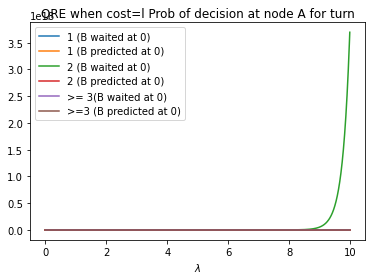

<ipython-input-91-96c9047d4671>:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['1 (A waited at 0)','1 (A predicted at 0)',


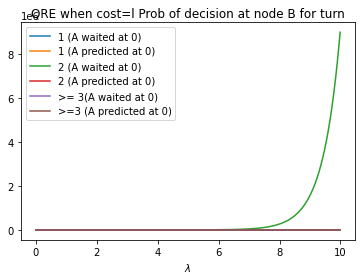

<ipython-input-91-96c9047d4671>:46: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['1 (A & B waited at 0)','1 (A predicted at 0, B waited)',


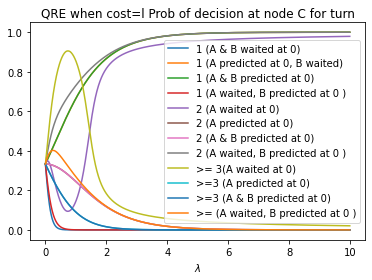

<ipython-input-91-96c9047d4671>:64: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['1 (B waited at 0)','1 ( B predicted at 0 )',


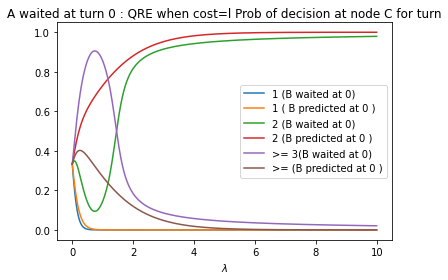

<ipython-input-91-96c9047d4671>:79: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['1 (B waited)',


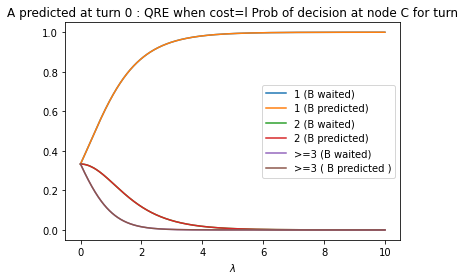

NameError: name 'QRE' is not defined

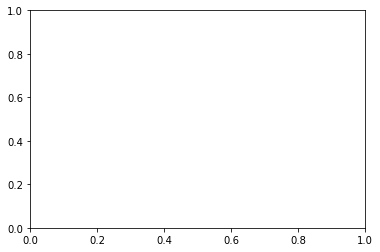

In [91]:
# Graphics
cost = "l"
name = "L"
QRE_turn1_A0B0= np.loadtxt(datafolder+'QRE_turn1_A0B0_b'+name+'.csv', delimiter=',')
QRE_turn1_A0Bnot0 = np.loadtxt(datafolder+'QRE_turn1_A0Bnot0_b'+name+'.csv',  delimiter=',')
QRE_turn1_Anot0Bnot0 = np.loadtxt(datafolder+'QRE_turn1_Anot0Bnot0_b'+name+'.csv', delimiter=',')
QRE_turn1_Anot0B0 = np.loadtxt(datafolder+'QRE_turn1_Anot0B0_b'+name+'.csv', delimiter=',')

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_turn1_Anot0Bnot0[:,1],lSeq,QRE_turn1_Anot0B0[:,1],
        lSeq, QRE_turn1_Anot0Bnot0[:,2],lSeq,QRE_turn1_Anot0B0[:,2],
        lSeq, QRE_turn1_Anot0Bnot0[:,3],lSeq,QRE_turn1_Anot0B0[:,3],)
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['1 (B waited at 0)','1 (B predicted at 0)',
                                   '2 (B waited at 0)','2 (B predicted at 0)',
                                   '>= 3(B waited at 0)','>=3 (B predicted at 0)'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node A for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_turn1_Anot0Bnot0[:,6],lSeq,QRE_turn1_A0Bnot0[:,6],
        lSeq, QRE_turn1_Anot0Bnot0[:,7],lSeq,QRE_turn1_A0Bnot0[:,7],
        lSeq, QRE_turn1_Anot0Bnot0[:,8],lSeq,QRE_turn1_A0Bnot0[:,8],)
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['1 (A waited at 0)','1 (A predicted at 0)',
                                   '2 (A waited at 0)','2 (A predicted at 0)',
                                   '>= 3(A waited at 0)','>=3 (A predicted at 0)'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node B for turn")
plt.show()       


#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_turn1_Anot0Bnot0[:,11],lSeq,QRE_turn1_A0Bnot0[:,11],
        lSeq, QRE_turn1_A0B0[:,11],lSeq,QRE_turn1_Anot0B0[:,11],
        lSeq, QRE_turn1_Anot0Bnot0[:,12],lSeq,QRE_turn1_A0Bnot0[:,12],
        lSeq, QRE_turn1_A0B0[:,12],lSeq,QRE_turn1_Anot0B0[:,12],
        lSeq, QRE_turn1_Anot0Bnot0[:,13],lSeq,QRE_turn1_A0Bnot0[:,13],
       lSeq, QRE_turn1_A0B0[:,13],lSeq,QRE_turn1_Anot0B0[:,13],)
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['1 (A & B waited at 0)','1 (A predicted at 0, B waited)',
                                   '1 (A & B predicted at 0)','1 (A waited, B predicted at 0 )',
                                   '2 (A waited at 0)','2 (A predicted at 0)',
                                   '2 (A & B predicted at 0)','2 (A waited, B predicted at 0 )',
                                   '>= 3(A waited at 0)','>=3 (A predicted at 0)',
                                  '>=3 (A & B predicted at 0)','>= (A waited, B predicted at 0 )',], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node C for turn")
plt.show()    



#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_turn1_Anot0Bnot0[:,11], lSeq,QRE_turn1_Anot0B0[:,11],
        lSeq, QRE_turn1_Anot0Bnot0[:,12], lSeq,QRE_turn1_Anot0B0[:,12],
        lSeq, QRE_turn1_Anot0Bnot0[:,13],lSeq,QRE_turn1_Anot0B0[:,13],)
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['1 (B waited at 0)','1 ( B predicted at 0 )',
                                   '2 (B waited at 0)','2 (B predicted at 0 )',
                                   '>= 3(B waited at 0)','>= (B predicted at 0 )',], loc = 0)
ax.set_title("A waited at turn 0 : QRE when cost="+str(cost)+" Prob of decision at node C for turn")
plt.show()    
#Plot
fig, ax = plt.subplots()
ax.plot(lSeq,QRE_turn1_A0Bnot0[:,11],
        lSeq, QRE_turn1_A0B0[:,11],
        lSeq,QRE_turn1_A0Bnot0[:,12],
        lSeq, QRE_turn1_A0B0[:,12],
        lSeq,QRE_turn1_A0Bnot0[:,13],
       lSeq, QRE_turn1_A0B0[:,13],)
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['1 (B waited)',
                                   '1 (B predicted)',
                                   '2 (B waited)',
                                   '2 (B predicted)',
                                   '>=3 (B waited)',
                                  '>=3 ( B predicted )',], loc = 0)
ax.set_title("A predicted at turn 0 : QRE when cost="+str(cost)+" Prob of decision at node C for turn")
plt.show()    












#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,11],lSeq, QRE[:,12],lSeq, QRE[:,13])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['1','2','>= 3'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node C for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,16],lSeq, QRE[:,17],lSeq, QRE[:,18])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['1','2','>= 3'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node D for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,21],lSeq, QRE[:,22],lSeq, QRE[:,23])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['1','2','>= 3'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node E for turn")
plt.show()    


In [90]:
QRE_turn1_Anot0Bnot0[:,3]

array([2.00000024e-01, 2.01644427e-01, 2.03379507e-01, 2.05227404e-01,
       2.07186863e-01, 2.09261605e-01, 2.11482583e-01, 2.13815569e-01,
       2.16283033e-01, 2.18882365e-01, 2.21631529e-01, 2.24529309e-01,
       2.27586458e-01, 2.30817861e-01, 2.34228829e-01, 2.37830577e-01,
       2.41619124e-01, 2.45650316e-01, 2.49913093e-01, 2.54397533e-01,
       2.59130801e-01, 2.64133509e-01, 2.69419376e-01, 2.75003248e-01,
       2.80901959e-01, 2.87132133e-01, 2.93715631e-01, 3.00672559e-01,
       3.08025404e-01, 3.15798405e-01, 3.24017637e-01, 3.32711261e-01,
       3.41909730e-01, 3.51646003e-01, 3.61955953e-01, 3.72878590e-01,
       3.84456522e-01, 3.96736146e-01, 4.09766875e-01, 4.23603552e-01,
       4.38307031e-01, 4.53956668e-01, 4.70603889e-01, 4.88265577e-01,
       5.07135610e-01, 5.27271651e-01, 5.48776518e-01, 5.71764375e-01,
       5.96360951e-01, 6.22704624e-01, 6.50947754e-01, 6.81257917e-01,
       7.13819381e-01, 7.48951816e-01, 7.86644568e-01, 8.27255251e-01,
      

In [58]:
i = 0 
l_no = np.array([QRE_h[i][1]+QRE_h[i][2], 
                 QRE_h[i][6]+QRE_h[i][7],
                 QRE_h[i][11]+QRE_h[i][12],
                 QRE_h[i][16]+QRE_h[i][17],
                 QRE_h[i][21]+QRE_h[i][22]])
X_more0 = ( decision_matrix>0) * 1
X_0 = decision_matrix==0 * 1
l = np.array([QRE_h[i][0], QRE_h[i][5],QRE_h[i][10],QRE_h[i][15],QRE_h[i][20]])
np.sum(np.dot(X_more0,np.log(l_no)))
np.sum(np.dot(X_0,np.log(l)))

-134.03038003767762

In [65]:
i = 9
l_no = np.array([QRE_h[i][1]+QRE_h[i][2], 
                 QRE_h[i][6]+QRE_h[i][7],
                 QRE_h[i][11]+QRE_h[i][12],
                 QRE_h[i][16]+QRE_h[i][17],
                 QRE_h[i][21]+QRE_h[i][22]])
l_no

array([0.63215613, 0.63214001, 0.4649082 , 0.4649082 , 0.4649082 ])

In [61]:
data = pd.read_csv(datafolder+"Networkb_CostH"+".csv", sep=",")

decision_matrix = data.iloc[:,3:].to_numpy()

lSeq = np.arange(0,10,.01)


likelihood = np.zeros(len(QRE_h))
for i in range(len(QRE_h)) :
    l = np.array([QRE_h[i][0], QRE_h[i][5],QRE_h[i][10],QRE_h[i][15],QRE_h[i][20]])
    l_no = np.array([QRE_h[i][1]+QRE_h[i][2], 
                     QRE_h[i][6]+QRE_h[i][7],
                     QRE_h[i][11]+QRE_h[i][12],
                     QRE_h[i][16]+QRE_h[i][17],
                     QRE_h[i][21]+QRE_h[i][22]])
    X_0 = decision_matrix==0 * 1
    X_more0 = (decision_matrix>0) * 1
    likeli_turn0 = np.sum(np.dot(X_0,np.log(l))) + np.sum(np.dot(X_more0,np.log(l_no)))
#     print("decide at turn 0: "+str( np.sum(np.dot(X_0,np.log(l)))))
#     print("wait at turn 0: "+str(np.sum(np.dot(X_more0,np.log(l_no)))))
    
    likeli_turn1 = 0
    X_1 = (decision_matrix ==1) * 1
    X_more1 = (decision_matrix>1) * 1
    for j in range(len(decision_matrix)):
        if decision_matrix[j][0] == 0 and decision_matrix[j][1]==0:
            QRE_turn1 = QRE_turn1_A0B0
        if decision_matrix[j][0] == 0 and decision_matrix[j][1]>0:
            QRE_turn1 = QRE_turn1_A0Bnot0
        if decision_matrix[j][0] > 0 and decision_matrix[j][1]>0:
            QRE_turn1 = QRE_turn1_Anot0Bnot0
        if decision_matrix[j][0] > 0 and decision_matrix[j][1]==0:
            QRE_turn1 = QRE_turn1_Anot0B0
            
        l1 = np.array([QRE_turn1[i][1], 
                       QRE_turn1[i][6],
                       QRE_turn1[i][11],
                       QRE_turn1[i][16],
                       QRE_turn1[i][21]])
        l1_no =  np.array([QRE_turn1[i][2]+QRE_turn1[i][3], 
                           QRE_turn1[i][7]+QRE_turn1[i][8],
                           QRE_turn1[i][12]+QRE_turn1[i][13],
                           QRE_turn1[i][17]+QRE_turn1[i][18],
                           QRE_turn1[i][22]+QRE_turn1[i][23]]) 
    
    
        likeli_j = np.dot(X_1[j], np.log(l1)) + np.dot(X_more1[j], np.log(l1_no))
#         likeli_j = np.dot(X_1[j], np.log(l1)) 
    likeli_turn1 += likeli_j

    likelihood[i] = likeli_turn0 + likeli_turn1
    
    
#     likeli_turn0[i] = np.sum(np.dot(Decide_0,np.log(l))) + np.sum(np.dot(1- Decide_0,np.log(l_no))) 
    
# np.savetxt(datafolder+'likeli_turn0_bH.csv', likeli_turn0, delimiter=',')    

# Note: network b, cost H, with the second expression, linear relationship
# Maybe only use the decision, not the wait 

decide at turn 0: -134.03038003767762
wait at turn 0: -193.81294599777422
decide at turn 0: -128.68742542140416
wait at turn 0: -203.88236786370868
decide at turn 0: -123.49898339224552
wait at turn 0: -214.51415600158344
decide at turn 0: -118.47661099790523
wait at turn 0: -225.71054184038212
decide at turn 0: -113.62209123319906
wait at turn 0: -237.49050606953176
decide at turn 0: -108.94224760537377
wait at turn 0: -249.85671266023616
decide at turn 0: -104.43956314372407
wait at turn 0: -262.81958377562466
decide at turn 0: -100.12000923162788
wait at turn 0: -276.37025733243684
decide at turn 0: -95.98443848028592
wait at turn 0: -290.51175144128956
decide at turn 0: -92.02854182383632
wait at turn 0: -305.26539745960855
decide at turn 0: -88.26407405281881
wait at turn 0: -320.57481542703675
decide at turn 0: -84.67330687020792
wait at turn 0: -336.5095697966485
decide at turn 0: -81.2713166489373
wait at turn 0: -352.97656458491565
decide at turn 0: -78.05801695428177
wait at 

decide at turn 0: -45.232514639737786
wait at turn 0: -3773.6789422008183
decide at turn 0: -45.34649457689807
wait at turn 0: -3795.8570940668587
decide at turn 0: -45.454738883845735
wait at turn 0: -3818.050020264729
decide at turn 0: -45.56609047472597
wait at turn 0: -3840.237263244162
decide at turn 0: -45.6776020181579
wait at turn 0: -3862.4220200910113
decide at turn 0: -45.788779056601854
wait at turn 0: -3884.607989567131
decide at turn 0: -45.90009395755837
wait at turn 0: -3906.7945539322945
decide at turn 0: -46.01208941189813
wait at turn 0: -3928.9782148768004
decide at turn 0: -46.12283733640092
wait at turn 0: -3951.1660808333336
decide at turn 0: -46.231102061099705
wait at turn 0: -3973.3601308260336
decide at turn 0: -46.344615020350844
wait at turn 0: -3995.539541902479
decide at turn 0: -46.4571593820025
wait at turn 0: -4017.7236657704952
decide at turn 0: -46.570744985214574
wait at turn 0: -4039.901276724037
decide at turn 0: -46.681579745259455
wait at turn 0

decide at turn 0: -58.900456336411274
wait at turn 0: -6325.287729529959
decide at turn 0: -59.02862901207229
wait at turn 0: -6347.487892746362
decide at turn 0: -59.14912173967255
wait at turn 0: -6369.709544809244
decide at turn 0: -59.275054696128706
wait at turn 0: -6391.91470534729
decide at turn 0: -59.40797922843418
wait at turn 0: -6414.103305901555
decide at turn 0: -59.537706052774084
wait at turn 0: -6436.300339051761
decide at turn 0: -59.66289756844566
wait at turn 0: -6458.513988438957
decide at turn 0: -59.789931887326304
wait at turn 0: -6480.719231345221
decide at turn 0: -59.91781683259102
wait at turn 0: -6502.923866420577
decide at turn 0: -60.04541998099482
wait at turn 0: -6525.131251911028
decide at turn 0: -60.17349492652223
wait at turn 0: -6547.335638210396
decide at turn 0: -60.301745825857566
wait at turn 0: -6569.5420413095
decide at turn 0: -60.427922064124544
wait at turn 0: -6591.755588743051
decide at turn 0: -60.555488023894355
wait at turn 0: -6613.9

decide at turn 0: -81.87537111108298
wait at turn 0: -10080.259005956183
decide at turn 0: -82.02670927499472
wait at turn 0: -10102.459339022387
decide at turn 0: -82.16821396502723
wait at turn 0: -10124.663400272208
decide at turn 0: -82.30914523535638
wait at turn 0: -10146.875924237647
decide at turn 0: -82.45767314810284
wait at turn 0: -10169.072000541002
decide at turn 0: -82.60524642971444
wait at turn 0: -10191.269982790851
decide at turn 0: -82.74621088388841
wait at turn 0: -10213.481873834911
decide at turn 0: -82.8918031024346
wait at turn 0: -10235.679309363462
decide at turn 0: -83.03196068755658
wait at turn 0: -10257.892392839309
decide at turn 0: -83.18143246154705
wait at turn 0: -10280.081639314983
decide at turn 0: -83.3258611797266
wait at turn 0: -10302.284082401713
decide at turn 0: -83.47145334663131
wait at turn 0: -10324.482996581744
decide at turn 0: -83.61486378513547
wait at turn 0: -10346.684464028735
decide at turn 0: -83.7604338799324
wait at turn 0: -

decide at turn 0: -105.67959025971277
wait at turn 0: -13588.609693067514
decide at turn 0: -105.83477670287664
wait at turn 0: -13610.380016506737
decide at turn 0: -105.98799322808497
wait at turn 0: -13632.176817227748
decide at turn 0: -106.14251173387876
wait at turn 0: -13653.973685561632
decide at turn 0: -106.29779642841794
wait at turn 0: -13675.757332955587
decide at turn 0: -106.45199712891602
wait at turn 0: -13697.519631661486
decide at turn 0: -106.60695557358525
wait at turn 0: -13719.2855125206
decide at turn 0: -106.76198017933815
wait at turn 0: -13741.018950733871
decide at turn 0: -106.91738690490254
wait at turn 0: -13762.805395095009
decide at turn 0: -107.07193228656976
wait at turn 0: -13784.528625460152
decide at turn 0: -107.22615089593937
wait at turn 0: -13806.291814218792
decide at turn 0: -107.38173711081532
wait at turn 0: -13828.01560321112
decide at turn 0: -107.53622177242916
wait at turn 0: -13849.759580436825
decide at turn 0: -107.69089662668202
wai

wait at turn 0: -17048.12651291023
decide at turn 0: -131.56310060233977
wait at turn 0: -17068.798354934108
decide at turn 0: -131.73080961601067
wait at turn 0: -17089.30500280219
decide at turn 0: -131.8905339909527
wait at turn 0: -17109.927716639595
decide at turn 0: -132.05037749009296
wait at turn 0: -17130.523998470508
decide at turn 0: -132.20998805961193
wait at turn 0: -17151.082287199628
decide at turn 0: -132.36837086029658
wait at turn 0: -17171.71526198952
decide at turn 0: -132.5349805224389
wait at turn 0: -17192.2208993581
decide at turn 0: -132.69663788599863
wait at turn 0: -17212.79422903229
decide at turn 0: -132.8556091613483
wait at turn 0: -17233.391031249168
decide at turn 0: -133.0165154390632
wait at turn 0: -17253.937549825023
decide at turn 0: -133.17747423668496
wait at turn 0: -17274.477307871854
decide at turn 0: -133.33845871504275
wait at turn 0: -17295.01113987885
decide at turn 0: -133.49947769864394
wait at turn 0: -17315.538599277665
decide at tur

decide at turn 0: -149.70971612228345
wait at turn 0: -19345.91378151009
decide at turn 0: -149.87329093361757
wait at turn 0: -19366.07650564535
decide at turn 0: -150.03692800942733
wait at turn 0: -19386.23775576105
decide at turn 0: -150.2006379370746
wait at turn 0: -19406.397429280532
decide at turn 0: -150.3644054462431
wait at turn 0: -19426.555904342742
decide at turn 0: -150.52824163794367
wait at turn 0: -19446.713617992256
decide at turn 0: -150.6922158780668
wait at turn 0: -19466.871674518457
decide at turn 0: -150.85673382657467
wait at turn 0: -19487.03642187348
decide at turn 0: -151.01756214019068
wait at turn 0: -19507.175080518347
decide at turn 0: -151.18705689749584
wait at turn 0: -19527.225301824954
decide at turn 0: -151.34580709697653
wait at turn 0: -19547.48251440205
decide at turn 0: -151.5100848297922
wait at turn 0: -19567.628828956833
decide at turn 0: -151.6747433829094
wait at turn 0: -19587.785830866793
decide at turn 0: -151.83873019259818
wait at tu

In [ ]:
data.subject_id.unique()
gb = data.groupby(["subject_id", "p_node"])[["RULE1", "RULE1_relaxed","RULE2","RULE3"]].sum()
# gb = data.groupby(["subject_id"]).aggregate({'RULE1' : 'sum', "RULE1_relaxed": 'sum',"RULE2": 'sum',"RULE3": 'sum'})
gb

In [ ]:
data.subject_id.unique()
gb = data.groupby(["subject_id","g_match"])[["RULE1", "RULE1_relaxed","RULE2","RULE3"]].sum()
# gb = data.groupby(["subject_id"]).aggregate({'RULE1' : 'sum', "RULE1_relaxed": 'sum',"RULE2": 'sum',"RULE3": 'sum'})
print(gb.loc)

In [ ]:
datafolder = "C:\\Users\\xinxi\\Purdue\\EffectiveSocialLearningProject\\DataAnalysis\\ImportedData\\"
data = pd.read_csv(datafolder+"Networkb_CostH"+".csv", sep=",")
Decide_0 = data.iloc[:,3:].to_numpy()==0
Decide_0*1

In [ ]:
 np.dot(Decide_0,np.array([1,1,1,1,1]))

# Step 2. Define Likelihood function /

### Define an error rate that is the same across all subjects
Formulating the likelihood function

You need to write down the Likelihood function that takes as an input a vector of proportions of strategies and returns the likelihood value(hw5_q1_final(basic))

In [ ]:
def likelihood(x):
    '''x is a len(availabel strategies)+1 vector, first is the beta/gamma, unknown errors same for all strategies'''
    #YOUR CODE GOES HERE
    likelihood = 0 
    
    decision_rules = ["RULE1","RULE2","RULE3"] 
    gb = data.groupby(["subject_id"])[decision_rules].sum()
    gb_size = data.groupby(["subject_id"])[decision_rules].count()

    sub_likelihood = []
    for subject_id in data.subject_id.unique() :
        p_s = 0
        subject_prob = []
        
        for i in range(len(decision_rules)):
            # Total number of rounds meets the decision rule
            correct = gb[decision_rules[i]].loc[subject_id]
            N = gb_size[decision_rules[i]].loc[subject_id]
            wrong = N-correct
            
            pi_s = x[i+1] * np.power(x[0], correct) * np.power((1-x[0]), wrong)       
            p_s += pi_s
#             print(str(stra)+str(i))
            ln_ps = np.log(p_s)
#         print(str(ln_ps))
        likelihood += ln_ps
                      
    return -likelihood

def constraint1(x): #x[0] - gamma, x[1:] - proportions of all strategies
    
    return x[1:].sum()-1

In [ ]:
x0 = np.zeros(4)
x0[0] = np.random.random()
temp = np.random.random(3) 
temp = temp/temp.sum()
x0[1:]=temp
x0

In [ ]:

likelihood(x0)

#### Optimization

You need to find the parameter that minimizes the -likelihood. Hint: think about potential problems associated with this optimization

In [ ]:
b = (0.0,1) # indicates bounds here, since it's probability, so between 0 and 1 
beta = (0.6,1)
#bnds = (b,b,b,b,b,b,b)
bnds = (beta,b,b,b)

simulaiton = 1
currentmin = 0
current_solution = []
while simulaiton <=50:
    x0 = np.zeros(4)
    #Some random starting point
    x0[0] = np.random.random()
    temp = np.random.random(3) #six proportions
    temp = temp/temp.sum()
    x0[1:]=temp

    con1 = {'type': 'eq', 'fun': constraint1} 
    cons = ([con1])

    solution = minimize(likelihood,x0,method='SLSQP',bounds=bnds,constraints=cons)
    if currentmin > likelihood(solution.x):
        currentmin = likelihood(solution.x)
        current_solution = solution.x

    simulaiton +=1
    print(simulaiton)

In [ ]:
solution.x

In [ ]:
likelihood(solution.x)# when prob = 0.5; 2079.441541679832
# when prob = 0.6, 2093



In [ ]:
data.p_node.unique()[0]

### Define the same error rate but allow different strategies across subjects

In [ ]:
def likelihood_Serror_Dstrategy(x_input):
    '''x is a (len(availabel strategies)-2) * # subjects +1 vector,
    first is the beta/gamma, unknown errors same for all strategies'''

    
    #YOUR CODE GOES HERE
    likelihood = 0 
    
    decision_rules = ["RULE1","RULE2","RULE3"] 
    gb = data.groupby(["subject_id"])[decision_rules].sum()
    gb_size = data.groupby(["subject_id"])[decision_rules].count()
    
    N_sub = len(data.subject_id.unique())
    N_decision = len(decision_rules)
    
    x_weight = x_input[1::]
    x_weight = np.reshape(x_weight, (-1,N_decision))
    x_error = x_input[0]
    

    sub_likelihood = []
    j = 0
    for subject_id in data.subject_id.unique() :
        p_s = 0
        subject_prob = []

        for i in range(N_decision):
            # Total number of rounds meets the decision rule
            correct = gb[decision_rules[i]].loc[subject_id]
            N = gb_size[decision_rules[i]].loc[subject_id]
            wrong = N-correct
            
            pi_s = x_weight[j,i] * np.power(x_error, correct) * np.power((1-x_error), wrong)       
            p_s += pi_s
#             print(str(stra)+str(i))
            ln_ps = np.log(p_s)
               
#         print(str(ln_ps))
        likelihood += ln_ps
        j += 1
                      
    return -likelihood

# def constraint1(x): #x[0] - gamma, x[1:] - proportions of all strategies
    
#     return x[1:].sum()-1

In [ ]:
b = (0.0,1) # indicates bounds here, since it's probability, so between 0 and 1 
beta = (0.6,1)
#bnds = (b,b,b,b,b,b,b)
bnds_sub = [b,b,b] * N_sub
bnds = tuple([beta]) + tuple(bnds_sub)


decision_rules = ["RULE1","RULE2","RULE3"] 
N_sub = len(data.subject_id.unique())
N_decision = len(decision_rules)


x0 = np.zeros(1+ N_decision* N_sub)
x0[0]= np.random.random()
temp = np.random.random(N_decision*N_sub)
temp = np.reshape(temp,(-1, N_decision))
temp_div = temp.sum(axis = 1).reshape(N_sub, 1)
temp_f = temp / temp_div
x0[1::] = temp_f.flatten()



from functools import partial

def f_constraint(x, index):
    return  np.reshape(x[1::], (-1, N_decision))[index,0::].sum() - 1

cons=[]
for i in range(N_sub):
    cons.append({'type': 'eq', 'fun':  partial(f_constraint, index=i) })

minimize(likelihood_Serror_Dstrategy,x0,method='SLSQP',bounds=bnds,constraints=cons)

In [ ]:
likelihood_Serror_Dstrategy(solution.x)

In [ ]:
b = (0.0,1) # indicates bounds here, since it's probability, so between 0 and 1 
beta = (0.6,1)
#bnds = (b,b,b,b,b,b,b)
bnds_sub = [b,b,b] * N_sub
bnds = tuple([beta]) + tuple(bnds_sub)


decision_rules = ["RULE1","RULE2","RULE3"] 
N_sub = len(data.subject_id.unique())
N_decision = len(decision_rules)

simulaiton = 1
currentmin = 0
current_solution = []
while simulaiton <=10:
    

    x0 = np.zeros(1+ N_decision* N_sub)
    x0[0]= np.random.random()
    temp = np.random.random(N_decision*N_sub)
    temp = np.reshape(temp,(-1, N_decision))
    temp_div = temp.sum(axis = 1).reshape(N_sub, 1)
    temp_f = temp / temp_div
    x0[1::] = temp_f.flatten()



    from functools import partial

    def f_constraint(x, index):
        return  np.reshape(x[1::], (-1, N_decision))[index,0::].sum() - 1

    cons=[]
    for i in range(N_sub):
        cons.append({'type': 'eq', 'fun':  partial(f_constraint, index=i) })

  

    solution = minimize(likelihood_Serror_Dstrategy,x0,method='SLSQP',bounds=bnds,constraints=cons)
    if currentmin > likelihood(solution.x):
        currentmin = likelihood(solution.x)
        current_solution = solution.x

    simulaiton +=1
    print(simulaiton)

In [ ]:
likelihood_Serror_Dstrategy(solution.x)
result = solution.x[1::]
result = np.reshape(result, (-1,3))
df = pd.DataFrame(result)
result

### Define the same weight on different strategies but allow different error rates across subjects

In [ ]:
def likelihood_Derror_Sstrategy(x_input):
    '''x is a len(availabel strategies) +1 * # subjects vector, first len(available strategies) are the weights
        The rest is the beta/gamma, unknown errors, different for each subject'''
    
    #YOUR CODE GOES HERE
    likelihood = 0 
    
    decision_rules = ["RULE1","RULE2","RULE3"] 
    gb = data.groupby(["subject_id"])[decision_rules].sum()
    gb_size = data.groupby(["subject_id"])[decision_rules].count()
    
    x_weight = x_input[0:len(decision_rules)]
    
    x_error = x_input[len(decision_rules)::]
   

    sub_likelihood = []
    j = 0
    for subject_id in data.subject_id.unique() :
        p_s = 0
        subject_prob = []
        
        for i in range(len(decision_rules)):
            # Total number of rounds meets the decision rule
            correct = gb[decision_rules[i]].loc[subject_id]
            N = gb_size[decision_rules[i]].loc[subject_id]
            wrong = N-correct
    
            pi_s = x_weight[i] * np.power(x_error[j], correct) * np.power((1-x_error[j]), wrong)       
            p_s += pi_s
#             print(str(stra)+str(i))
            ln_ps = np.log(p_s)
#         print(str(ln_ps))
        likelihood += ln_ps
        j += 1
                      
    return -likelihood

def constraint1(x_input): #x[0] - gamma, x[1:] - proportions of all strategies
    decision_rules = ["RULE1","RULE2","RULE3"] 
    
    x_weight = x_input[0:len(decision_rules)]
    
    
    return x_weight[0:].sum()-1

#### Optimization 

In [ ]:
b = (0.0,1) # indicates bounds here, since it's probability, so between 0 and 1 
beta = (0.5,1)
#bnds = (b,b,b,b,b,b,b)
bnds_sub = [beta] * N_sub
bnds = (b,b,b) + tuple(bnds_sub)

decision_rules = ["RULE1","RULE2","RULE3"] 
N_sub = len(data.subject_id.unique())
N_decision = len(decision_rules)

simulaiton = 1
currentmin = 0
current_solution = []
while simulaiton <=50:
    
    x0 = np.zeros(N_decision+N_sub)
    temp = np.random.random(N_decision) #six proportions
    temp = temp/temp.sum()
    x0[0:N_decision]=temp
    x0[N_decision::] = np.random.random(N_sub)
    
    con1 = {'type': 'eq', 'fun': constraint1} 
    cons = ([con1])

    solution = minimize(likelihood_Derror_Sstrategy,x0,method='SLSQP',bounds=bnds,constraints=cons)
    if currentmin > likelihood(solution.x):
        currentmin = likelihood(solution.x)
        current_solution = solution.x

    simulaiton +=1
    print(simulaiton)

In [ ]:
solution.x
# error_rate = np.reshape(solution.x[3::], (-1,1))
# error_rate

In [ ]:
solution.x
[When simulation lasts for 50 times!]
0.051, 0.000, 0.949, 

Subjects prob: 
       1.000, 0.831, 0.789, 0.500, 0.819, 0.500,
       0.784, 0.500, 0.500, 0.500, 0.500, 0.849, 0.500, 0.683, 0.994,
       0.856, 0.822, 0.938, 0.500, 0.500, 0.977, 0.500, 0.500, 0.560,
       0.500, 0.500, 0.500, 0.787, 0.500, 0.500, 0.500, 0.500, 0.500,
       0.500, 0.834, 0.500, 0.656, 0.500, 0.500, 0.957, 0.933, 0.500,
       0.500, 0.500, 0.720, 0.752, 0.619, 0.633, 0.500, 0.500, 0.500,
       0.626, 0.500, 0.504, 0.500, 0.897, 0.720, 0.792, 0.597, 0.500,
       0.597, 0.946, 0.840, 0.740, 0.500, 0.500, 0.967, 0.500, 0.957,
       0.500, 0.500, 0.530, 0.774, 0.500, 0.791, 0.770, 0.500, 0.771,
       0.912, 0.652, 0.500, 0.745, 0.500, 0.593, 0.752, 0.861, 0.500,
       0.500, 0.500, 0.515, 0.500, 0.673, 0.727, 0.612, 0.500, 0.500,
       0.641, 0.764, 0.500, 0.940]

solution.x [FOr 5 simulations!!!]
#array([0.051, 0.000, 0.949, 
(large weight on the "patient subject")
Prob: (high heterogeneity):
        1.000, 0.988, 0.500, 0.628, 0.500, 0.532,
       0.654, 0.688, 0.500, 0.500, 0.623, 0.500, 0.500, 0.744, 0.664,
       0.500, 0.655, 0.500, 0.500, 0.500, 0.500, 0.688, 0.500, 0.500,
       0.500, 0.500, 0.500, 0.767, 0.500, 0.500, 0.500, 0.979, 0.983,
       0.700, 0.500, 0.805, 0.935, 0.500, 0.500, 0.500, 0.883, 0.610,
       0.500, 0.866, 0.842, 0.935, 0.651, 0.897, 0.500, 0.500, 0.500,
       0.518, 0.580, 0.670, 0.500, 0.785, 0.500, 0.500, 0.500, 0.749,
       0.500, 0.500, 0.577, 0.994, 0.694, 0.500, 0.862, 0.669, 0.500,
       0.500, 0.500, 0.728, 0.500, 0.500, 0.640, 0.500, 0.847, 0.500,
       0.500, 0.908, 0.999, 0.500, 0.752, 0.506, 0.500, 0.719, 0.500,
       0.526, 0.500, 0.755, 0.500, 0.828, 0.500, 0.948, 0.990, 0.655,
       0.804, 0.908, 0.500, 0.500])

### Define an error rate that is the same across different positions

In [ ]:
def likelihood_node(x):
    '''x is a len(p_node) [5] * len(availabel strategies)+1  vector, 
    first is the beta/gamma, unknown errors same for all strategies
    '''
    x = np.reshape(x, (-1,4))
    
    #YOUR CODE GOES HERE
    likelihood = 0 
    
    decision_rules = ["RULE1","RULE2","RULE3"] 
    gb = data.groupby(["subject_id","p_node"])[decision_rules].sum()
    gb_size = data.groupby(["subject_id","p_node"])[decision_rules].count()
    node_list = data.p_node.unique()
#     print(node_list)

    sub_likelihood = []
    for subject_id in data.subject_id.unique() :
        p_s = 0
        subject_prob = []
        for j in range(len(node_list)) :
            for i in range(len(decision_rules)):
                # Total number of rounds meets the decision rule
                correct = gb[decision_rules[i]].loc[subject_id, node_list[j] ]
                N = gb_size[decision_rules[i]].loc[subject_id,  node_list[j] ]
                wrong = N-correct

                pi_s = x[j, i+1] * np.power(x[j, 0], correct) * np.power((1-x[j, 0]), wrong)       
                p_s += pi_s
    #             print(str(stra)+str(i))
                ln_ps = np.log(p_s)
    #         print(str(ln_ps))
            likelihood += ln_ps

    return -likelihood

# def constraint1_node(x): #x[0] - gamma, x[1:] - proportions of all strategies
#     x = np.reshape(x, (-1,4))
#     return sum(x[:,1:].sum(axis=1) - np.ones(len(x)))
def constraint1_node(x): #x[0] - gamma, x[1:] - proportions of all strategies
    x = np.reshape(x, (-1,4))
    return x[1,1:].sum() - 1
def constraint2_node(x): #x[0] - gamma, x[1:] - proportions of all strategies
    x = np.reshape(x, (-1,4))
    return x[2,1:].sum() - 1
def constraint3_node(x): #x[0] - gamma, x[1:] - proportions of all strategies
    x = np.reshape(x, (-1,4))
    return x[3,1:].sum() - 1
def constraint4_node(x): #x[0] - gamma, x[1:] - proportions of all strategies
    x = np.reshape(x, (-1,4))
    return x[4,1:].sum() - 1
def constraint0_node(x): #x[0] - gamma, x[1:] - proportions of all strategies
    x = np.reshape(x, (-1,4))
    return x[0,1:].sum() - 1

def constraint_node(x): #x[0] - gamma, x[1:] - proportions of all strategies
    x = np.reshape(x, (-1,4))
    return x

for i in range(5):
    name = constraint+str(i)+test
    def name(x) :
        x = np.repshape(x, (-1,4))
        return print(i)

In [ ]:
x0 = np.zeros((5,4))
for i in range(5):
    x0[i, 0] = np.random.random()
    temp = np.random.random(3) 
    temp = temp/temp.sum()
    x0[i, 1:]=temp
x0


In [ ]:
likelihood_node(x0)

In [ ]:
eq_cons = {'type': 'eq',
           'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
           'jac' : lambda x: np.array([2.0, 1.0])}

In [ ]:
x0

In [ ]:
cons = []
for i in range(5) :
    con =  {'type': 'eq', 'fun': lambda x : np.reshape(x, (-1, 4))[i,1::].sum() - 1} 
    cons.append(con)
print(cons)

In [ ]:
b = (0.0,1) # indicates bounds here, since it's probability, so between 0 and 1 
beta = (0.5,1)
#bnds = (b,b,b,b,b,b,b)
bnds_row = (beta,b,b,b)
bnds = bnds_row *5

x00 = x0.flatten()
# con0 =  {'type': 'eq', 'fun': constraint0_node} 
# con1 =  {'type': 'eq', 'fun': constraint1_node} 
# con2 =  {'type': 'eq', 'fun': constraint2_node} 
# con3 =  {'type': 'eq', 'fun': constraint3_node} 
# con4 =  {'type': 'eq', 'fun': constraint4_node} 
# cons = ([con0,con1,con2,con3,con4])
# cons = ([{'type': 'eq', 'fun': lambda x : np.reshape(x, (-1, 4))[0,1::].sum() - 1},
#         {'type': 'eq', 'fun': lambda x : np.reshape(x, (-1, 4))[1,1::].sum() - 1},
#         {'type': 'eq', 'fun': lambda x : np.reshape(x, (-1, 4))[2,1::].sum() - 1},
#         {'type': 'eq', 'fun': lambda x : np.reshape(x, (-1, 4))[3,1::].sum() - 1},
#         {'type': 'eq', 'fun': lambda x : np.reshape(x, (-1, 4))[4,1::].sum() - 1}])
# cons = []
# for i in range(5) :
#     con =  {'type': 'eq', 'fun':  lambda x : np.reshape(x, (-1, 4))[i,1::].sum() - 1} 
#     cons.append(con)

from functools import partial

def f_constraint(x, index):
    return  np.reshape(x, (-1, 4))[index,1::].sum() - 1

cons=[]
for i in range(5):
    cons.append({'type': 'eq', 'fun':  partial(f_constraint, index=i) })
# print(cons)
minimize(likelihood_node,x00,method='SLSQP',bounds=bnds,constraints=cons)

In [ ]:
Wrong index?
fun: 1632.1807562772549
     jac: array([377.122, -798.699, -143.509, -100.411, 629.362, -131.536, -131.536,
       -131.536, 323.189, -74.436, -74.436, -74.436, -208.032, -81.925,
       -27.089, -19.344, 43.111, -18.134, -18.134, -18.134])
 message: 'Singular matrix C in LSQ subproblem'
    nfev: 21
     nit: 1
    njev: 1
  status: 6
 success: False
       x: array([0.872, 0.165, 0.393, 0.442, 0.500, 0.468, 0.065, 0.467, 0.500,
       0.180, 0.423, 0.397, 0.820, 0.350, 0.287, 0.363, 0.500, 0.469,
       0.346, 0.185])

In [ ]:
print(data.p_node.unique())

*** first time:
     fun: 1455.4634189207438
     jac: array([1116.690, -224.159, -224.159, -224.159, 654.525, -124.159,
       -124.159, -124.159, 251.698, -74.159, -74.159, -74.159, -19.532,
       -44.771, -44.765, -44.769, -61.878, -32.756, -32.755, -32.754])
 message: 'Optimization terminated successfully'
    nfev: 261
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.500, 0.369, 0.390, 0.241, 0.500, 0.281, 0.364, 0.355, 0.500,
       0.704, 0.033, 0.263, 1.000, 0.763, 0.200, 0.037, 1.000, 0.676,
       0.067, 0.257])
**** second time:
        fun: 1343.8430812538954
     jac: array([1649.901, -249.142, -249.142, -249.142, 0.000, -103.489, -103.485,
       -85.556, 447.419, -82.679, -82.679, -82.679, 0.019, -35.582,
       -35.572, -35.609, -17.633, -29.112, -29.121, -29.107])
 message: 'Optimization terminated successfully'
    nfev: 394
     nit: 22
    njev: 18
  status: 0
 success: True
       x: array([0.500, 0.184, 0.229, 0.587, 0.970, 0.668, 0.332, 0.000, 0.500,
       0.052, 0.880, 0.068, 0.985, 0.911, 0.085, 0.003, 1.000, 0.660,
       0.059, 0.281])

Optimization
You need to find the parameter that minimizes the -likelihood. Hint: think about potential problems associated with this optimization

In [ ]:
b = (0.0,1) # indicates bounds here, since it's probability, so between 0 and 1 
beta = (0.6,1)
#bnds = (b,b,b,b,b,b,b)
bnds_row = (beta,b,b,b)
bnds = bnds_row *5


simulaiton = 1
currentmin = 0
current_solution = []
while simulaiton <=50:
    x0 = np.zeros((5,4))
    for i in range(5):
        x0[i, 0] = np.random.random()
        temp = np.random.random(3) 
        temp = temp/temp.sum()
        x0[i, 1:]=temp
    x00 = x0.flatten()
    con0 =  {'type': 'eq', 'fun': constraint0_node} 
    con1 =  {'type': 'eq', 'fun': constraint1_node} 
    con2 =  {'type': 'eq', 'fun': constraint2_node} 
    con3 =  {'type': 'eq', 'fun': constraint3_node} 
    con4 =  {'type': 'eq', 'fun': constraint4_node} 
    cons = ([con0,con1,con2,con3,con4])
    solution = minimize(likelihood_node,x00,method='SLSQP',bounds=bnds,constraints=cons)
    if currentmin > likelihood(solution.x):
        currentmin = likelihood(solution.x)
        current_solution = solution.x

    simulaiton +=1
    print(simulaiton)

In [ ]:
solution.x
# B : 0.600, 0.996, 0.004, 0.000,
  D : 0.965, 0.668, 0.332, 0.000,
  E : 0.600, 0.500, 0.285, 0.215, 
  C : 0.600, 1.000, 0.000, 0.000, 
  A : 1.000, 0.631, 0.069, 0.300]


### Define an error rate that is the same across all subjects

In [ ]:
def loglikelihood(epslon):
    """Assume that all subjects have the same error rate"""
    

#     decision_rules = ["RULE1","RULE2","RULE3"] (only "subject_id", epslon = .94)
#     decision_rules = ["RULE1_relaxed","RULE2","RULE3"] (only "subject_id",esplon=.95, similar)
    decision_rules = ["RULE1","RULE2","RULE3"] 
    gb = data.groupby(["subject_id"])[decision_rules].sum()
    gb_size = data.groupby(["subject_id"])[decision_rules].count()
    
    loglike = 0
    sub_likelihood = []
    for subject_id in data.subject_id.unique() :
        subject_prob = []
        
        for i in range(len(decision_rules)):
            # Total number of rounds meets the decision rule
            count = gb[decision_rules[i]].loc[subject_id]
            N = gb_size[decision_rules[i]].loc[subject_id]
           
            
            # Note: in El-Gamal and Grether (1995), the error is symmetric, thus prob of making a mistake is epslon/2
            # Since here we haven't considered the error size, just denote 1 as the waiting period meets the defined decision rule, 
            # I assume people will make an error with prob epslon
            ## LATER: define error rate for waiting too short and too long! 
            
#             prob = ((1-epslon)**(count))*(epslon**(N-count))
            log_prob = count * np.log(1-epslon) + (N-count)* np.log(epslon)
#             print([count, N, epslon])
            subject_prob.append(log_prob)
#             subject_prob.append(prob)
            
            
#         print(subject_prob) 
#         sub_likelihood.append([subject_id, subject_prob])
        sub_likelihood.append([subject_id, subject_prob])
#         print(max(subject_prob))
#         print(sub_likelihood)
        loglike  += max(subject_prob)
    
    return -loglike

In [ ]:
epslon = .9
sub_likelihood = []
for subject_id in data.subject_id.unique() :
    decision_rules = ["RULE1","RULE2","RULE3"]
    gb = data.groupby(["subject_id"])[decision_rules].sum()
    gb_size = data.groupby(["subject_id"])[decision_rules].count()
    
    subject_prob = []
    for i in range(len(decision_rules)):
        count = gb[decision_rules[i]].loc[subject_id]
        N = gb_size[decision_rules[i]].loc[subject_id]
        prob = ((1-epslon)**(count))*(epslon**(N-count))
        subject_prob.append(prob)
    
    sub_likelihood.append([subject_id, subject_prob])
# sub_likelihood[]    

### Define an error rate that is the same across different positions

In [ ]:
def loglikelihood(epslon_list):
    """Assume that all subjects have the same error rate, by node"""
    

#     decision_rules = ["RULE1","RULE2","RULE3"] (epslon = .94)
#     decision_rules = ["RULE1_relaxed","RULE2","RULE3"] (similar)
    decision_rules = ["RULE1","RULE2","RULE3"] 
    gb = data.groupby(["subject_id","p_node"])[decision_rules].sum()
    gb_size = data.groupby(["subject_id","p_node"])[decision_rules].count()
    p_node_list = data.p_node.unique()
    
    loglike = 0
    sub_likelihood = []
    
    for subject_id in data.subject_id.unique() :
        subject_prob = []
        for ii in range(5):
        
            for i in range(len(decision_rules)):
                # Total number of rounds meets the decision rule
                count = gb[decision_rules[i]].loc[subject_id,p_node_list[ii] ]
                N = gb_size[decision_rules[i]].loc[subject_id, p_node_list[ii]]
                epslon = epslon_list[ii]


                # Note: in El-Gamal and Grether (1995), the error is symmetric, thus prob of making a mistake is epslon/2
                # Since here we haven't considered the error size, just denote 1 as the waiting period meets the defined decision rule, 
                # I assume people will make an error with prob epslon
                ## LATER: define error rate for waiting too short and too long! 

    #             prob = ((1-epslon)**(count))*(epslon**(N-count))
                log_prob = count * np.log(1-epslon) + (N-count)* np.log(epslon)
    #             print([count, N, epslon])
                subject_prob.append(log_prob)
    #             subject_prob.append(prob)


    #         print(subject_prob) 
    #         sub_likelihood.append([subject_id, subject_prob])
            sub_likelihood.append([subject_id, p_node_list[ii],subject_prob])
    #         print(max(subject_prob))
    #         print(sub_likelihood)
            loglike  += max(subject_prob)
    
    return -loglike

In [ ]:
# loglikelihood([0.1,0.1,0.1,0.1,0.1])
b = (0.0,1) # indicates bounds here, since it's probability, so between 0 and 1 
beta = (0.5,1)
#bnds = (b,b,b,b,b,b,b)
bnds = (b,b,b,b,b)


res = minimize(loglikelihood,[0.1,0.1,0.1,0.1,0.1], method='SLSQP',bounds=bnds)

In [ ]:
# loglikelihood(.9)
# gb_size = data.groupby(["subject_id"])[decision_rules].count()
# gb_size
# print(sub_likelihood)

res = minimize(loglikelihood,0.5, method='SLSQP')
res
#Note: using np.log start with .1 this estimate is 0.39; start with .2, estimate is .95
#Note: 


simulation = 1
ideal_lamda = 0
max_likelihood = 20000
while simulation <=20:
#     res = minimize(loglikelihood, p0, args=(l,cost,gamma,), method='SLSQP',constraints=cons)
    lamda0  = np.random.random()
    res = minimize(loglikelihood, lamda0,  method='SLSQP')
    if loglikelihood(res.x) < max_likelihood :
        max_likelihood = loglikelihood(res.x)
        ideal_lamda = res.x
        print(ideal_lamda)
    print(simulation)
    simulation += 1 

ideal_lamda
loglike_estimate = loglikelihood(ideal_lamda)

In [ ]:
sub_likelihood

Homework. q3 Replicate Table 11 QRE MLE
Extenstion: obtain the MLE and estimated lamda for all four treatments

In [ ]:
def loglikelihood(lamda, q, t):
    '''Q is the probability of receiving correct signal, exogeneous, varies in the treatment,
    for homework 6, Q = 5/9
    In the function, capital A and B denotes actions, a and b are for signals'''
    
    # Initial p public belief as 1/2
    p = 1/2
    Q = q
    T = t
    logL = 0 
    i = 1
    # obtain signal and decision in each t , here is where my loop begins
#     signal =
#     choice = 
    for i in range(len(choiceset)):


        signal = signalset[i]
        choice = choiceset[i]

        # define agent's private posterior beliefs:
        pi_a = Q*p / (Q*p + (1-Q)*(1-p))
        pi_b = (1-Q)*p / ((1-Q)*p + Q*(1-p))

      # define probability of making choices A and B conditional on signal a and b
        P_A_a = 1 / (1 + np.exp(lamda*(1-2*pi_a)))
        P_A_b = 1/ (1 + np.exp(lamda*(1-2*pi_b)))
        P_B_a = 1 - P_A_a
        P_B_b = 1 - P_A_b

        # define the evolvement of public belief
        p_plus = (Q*p*P_A_a + p*(1-Q)*P_A_b) / ((p*Q+(1-p)*(1-Q))*P_A_a + (p*(1-Q)+(1-p)*Q)*P_A_b)
        p_minus = (p*Q*P_B_a + p*(1-Q)*P_B_b) / ((p*Q+(1-p)*(1-Q))*P_B_a + (p*(1-Q)+(1-p)*Q)*P_B_b )



        # define the log likelihood
        # Note here 0 stands for choice A and signal a, 1 is for choice B and signal b
#         if signal == 1 and choice == 1 :
#             logL += np.log(P_A_a)
#             p = p_plus
#         elif signal == 0 and choice == 1 :
#             logL += np.log(P_A_b)
#             p = p_plus
#         elif signal == 1 and choice == 0:
#             logL += np.log(P_B_a)
#             p = p_minus
#         elif signal == 0 and choice ==0 :
#             logL += np.log(P_B_b)
#             p = p_minus

#         What I thought would be the correct coding
#       Note, at the end of each match, we need to put the intial p back to 1/2
        if signal == 0 and choice == 0 :
            logL += np.log(P_A_a)
            p = p_plus
        elif signal == 1 and choice == 0 :
            logL += np.log(P_A_b)
            p = p_plus
        elif signal == 0 and choice == 1:
            logL += np.log(P_B_a)
            p = p_minus
        elif signal == 1 and choice ==1 :
            logL += np.log(P_B_b)
            p = p_minus
        
        if divmod(i ,T)[1]==0 and i != 0 :
            p = 1/2
#             print(i)
            

#     print(divmod(i ,20))

    
    return -logL
    